# Figure 7

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import pandas as pd
import scipy.stats as sp
import importlib
from matplotlib import patches

import replay_structure.metadata as meta
import replay_structure.read_write as read_write

In [2]:
SMALL_SIZE = 5
MEDIUM_SIZE = 6
BIGGER_SIZE = 7

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
ripple_trajectories = dict()
for session in meta.Session_List:
    ripple_trajectories[str(session)] = read_write.load_trajectory_results(session, meta.Ripple_Data.default_time_window_ms, meta.Ripple_Data.name, meta.Ripple_Data.default_likelihood_function)

loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/ripples/rat1day1_4cm_3ms_poisson_trajectories.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/ripples/rat1day2_4cm_3ms_poisson_trajectories.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/ripples/rat2day1_4cm_3ms_poisson_trajectories.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/ripples/rat2day2_4cm_3ms_poisson_trajectories.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/ripples/rat3day1_4cm_3ms_poisson_trajectories.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/ripples/rat3day2_4cm_3ms_poisson_trajectories.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/ripples/rat4day1_4cm_3ms_poisson_trajectories.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/ripples/rat4day2_4cm_3ms_poisson_trajector

In [4]:
summary_df = read_write.load_descriptive_stats(meta.Ripple_Data.default_time_window_ms, meta.Ripple_Data.name, meta.Ripple_Data.default_likelihood_function)
summary_df

,Unnamed: 0,avg_fr,best_fit_model,current_location_type,current_location_x,current_location_y,day,diffusion_model_ev,direct_distance_cm,direction,...,stationary_gaussian_model_ev,stationary_model_ev,straightness,trajectory_model,trial_duration_s,trial_number,trial_type,velocity_cm_s,replay_num_in_trial,n_replay_in_trial
0,0,3.436820,momentum,goal,66.478738,31.155137,1.0,-456.955650,45.607017,37.874984,...,-463.842065,-482.253703,0.381336,1.0,72.97,1.0,away,927.116122,0.0,2.0
1,1,2.589365,momentum,goal,66.073476,31.248421,1.0,-220.727414,16.000000,-90.000000,...,-222.260937,-220.674014,1.000000,1.0,72.97,1.0,away,205.128205,1.0,2.0
2,2,4.475353,momentum,other,18.867419,20.117264,1.0,-1411.608250,84.095184,87.273689,...,-1417.952165,-1418.521579,0.394341,1.0,35.87,2.0,home,696.911222,0.0,5.0
3,3,1.419387,stationary,other,20.488297,20.071055,1.0,-294.809172,34.176015,69.443955,...,-295.060812,-292.983732,0.438485,0.0,35.87,2.0,home,440.345342,NaN,NaN
4,4,5.864415,momentum,other,20.013156,20.200843,1.0,-315.773757,32.249031,60.255119,...,-323.074706,-324.828613,0.774159,1.0,35.87,2.0,home,661.219909,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2975,2975,2.887654,momentum,home,146.601512,139.807018,2.0,-240.835748,51.224994,51.340192,...,-263.285068,-275.298956,0.859888,1.0,62.90,40.0,home,522.558675,51.0,53.0
2976,2976,2.719323,momentum,home,146.745003,139.739066,2.0,-399.186814,49.477268,-14.036243,...,-440.978241,-470.558946,0.403476,1.0,62.90,40.0,home,610.086652,52.0,53.0
2977,2977,2.787068,momentum,home,143.079403,140.745294,2.0,-157.485010,44.721360,79.695154,...,-167.749242,-173.225709,0.900608,1.0,224.50,41.0,away,636.626337,0.0,2.0
2978,2978,1.882176,momentum,home,143.327045,139.894720,2.0,-155.396201,21.540659,68.198591,...,-158.325854,-158.857637,0.517098,1.0,224.50,41.0,away,420.776306,1.0,2.0


In [5]:
# load predictive results
behavior_paths, angular_distance = read_write.load_predictive_analysis(meta.Ripple_Data.default_time_window_ms, meta.Ripple_Data.name, meta.Ripple_Data.default_likelihood_function, "viterbi")

loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/ripples/predictive_analysis_4cm_3ms_poisson_viterbitrajectories.obj


In [6]:
def get_circle(center_cm, radius_cm):
    points_x = np.linspace(-radius_cm, +radius_cm, 200)
    points_y = np.sqrt(radius_cm ** 2 - points_x ** 2)
    points_x = np.append(points_x, np.flip(points_x))
    points_y = np.append(points_y, -points_y)
    circle = np.array([points_x + center_cm[0], points_y + center_cm[1]]).T
    return circle

In [7]:
legend_labels = {'trajectory_model': 'Trajectory model', 'map_classified_PF': 'Previously classified'}
tick_fontsize=5
map_classified = "map_classified_PF"

AWAY = NOT HOME


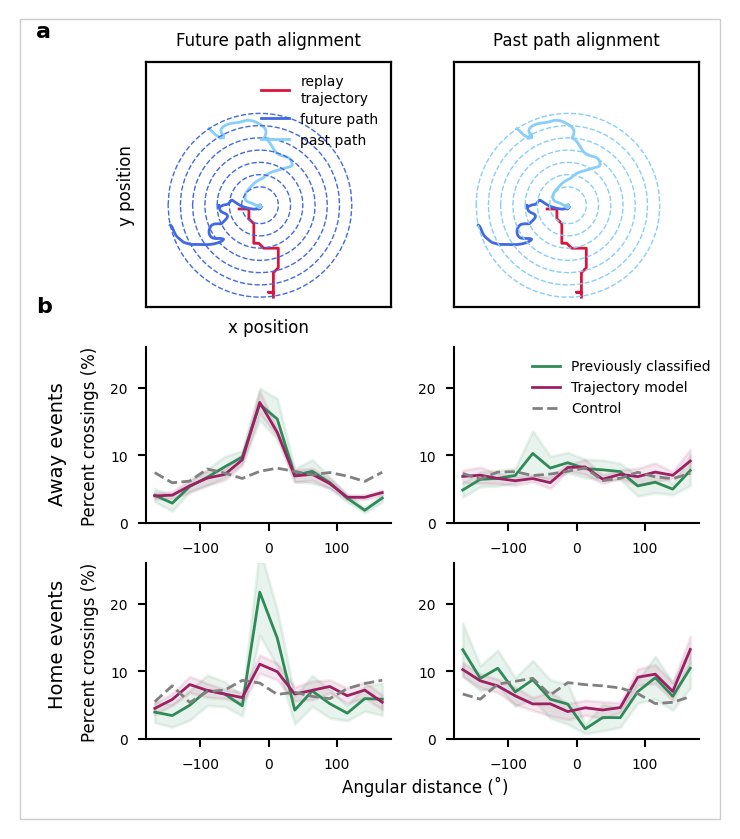

In [8]:
figure_width = 3.5
figure_height = 4

left_margin = 0.18
right_margin = 0.07
header_height = .05
footer_height = 0.1

w_spacing = 0.05
w_spacing = 0.09
h_spacing = 0.05

# define plot dimensions (relative to a "1x1" plot for a marginal)
panel_width = .35
panel_height = .22

fig = plt.figure(
    figsize=(figure_width, figure_height), dpi=200, facecolor="w", edgecolor="k"
)
ax = dict()
top_row_panel_bottom = footer_height + panel_height + h_spacing
right_column_left = left_margin + panel_width + w_spacing

ax[0,0] = fig.add_axes([left_margin, top_row_panel_bottom, panel_width, panel_height])
ax[0,1] = fig.add_axes([right_column_left, top_row_panel_bottom, panel_width, panel_height])
ax[1,0] = fig.add_axes([left_margin, footer_height, panel_width, panel_height])
ax[1,1] = fig.add_axes([right_column_left, footer_height, panel_width, panel_height])


n_bins=15
angular_distance_hist = dict()

bins = np.linspace(-180,180,n_bins)
colors = {'map_classified_PF': 'seagreen', 'trajectory_model': '#9e1f63'}#'crimson'} 'slateblue'
edge_linewidth=3
x = bins[:-1] + np.diff(bins)/2


for trajectory_type in ['map_classified_PF', 'trajectory_model']:
    for behavior_path_type in ['past', 'future']:
        for location_type in ['home', 'away']:
            angular_distance_hist[trajectory_type, behavior_path_type, location_type] = np.zeros((8,n_bins-1))
            for i, session in enumerate(meta.Session_List):
                rat = session.rat
                day = session.day
                if location_type == 'home':
                    hist= np.histogram((angular_distance[behavior_path_type][(summary_df[trajectory_type]==True) & 
                                                                 (summary_df['current_location_type']=='home') & 
                                                                 (summary_df['rat']==rat) & 
                                                                 (summary_df['day']==day)]).flatten(), 
                                       bins=bins, density=True)
                elif location_type == 'away':
                    hist= np.histogram((angular_distance[behavior_path_type][(summary_df[trajectory_type]==True) & 
                                                                 (summary_df['current_location_type']!='home') &
                                                                 (summary_df['rat']==rat) & 
                                                                 (summary_df['day']==day)]).flatten(), 
                                       bins=bins, density=True) 
                else: 
                    print('hi')
                angular_distance_hist[trajectory_type, behavior_path_type, location_type][i] = hist[0]/np.sum(hist[0])*100
            

            row = 0 if location_type == 'away' else 1
            col = 0 if behavior_path_type == 'future' else 1
            ax[row,col].plot(x, np.nanmean(angular_distance_hist[trajectory_type, behavior_path_type, location_type], axis=0), 
                         label=legend_labels[trajectory_type], color=colors[trajectory_type], linewidth=1)
            ax[row,col].fill_between(x, 
                                     np.nanmean(angular_distance_hist[trajectory_type, behavior_path_type, location_type], axis=0) - np.nanstd(angular_distance_hist[trajectory_type, behavior_path_type, location_type], axis=0)/np.sqrt(8), 
                                     np.nanmean(angular_distance_hist[trajectory_type, behavior_path_type, location_type], axis=0) + np.nanstd(angular_distance_hist[trajectory_type, behavior_path_type, location_type], axis=0)/np.sqrt(8),
                        color=colors[trajectory_type], alpha=.1, edgecolor='white')
        
           
             
hist= np.histogram((angular_distance['control_past'][(summary_df['current_location_type']!='home')]).flatten(), 
                    bins=bins, density=True)
ax[0,0].plot(x, hist[0]/np.sum(hist[0])*100, label='Control', color='gray', linestyle='--', linewidth=1)
hist= np.histogram((angular_distance['control_future'][(summary_df['current_location_type']!='home')]).flatten(), 
                   bins=bins, density=True)
ax[0,1].plot(x, hist[0]/np.sum(hist[0])*100, label='Control', color='gray', linestyle='--', linewidth=1)
hist= np.histogram((angular_distance['control_past'][(summary_df['current_location_type']=='home')]).flatten(), 
                   bins=bins, density=True)
ax[1,0].plot(x, hist[0]/np.sum(hist[0])*100, label='Control', color='gray', linestyle='--', linewidth=1)
hist= np.histogram((angular_distance['control_future'][(summary_df['current_location_type']=='home')]).flatten(), 
                   bins=bins, density=True)
ax[1,1].plot(x, hist[0]/np.sum(hist[0])*100, label='Control', color='gray', linestyle='--', linewidth=1)


for row in range(2):
    for col in range(2):
        ax[row,col].tick_params(direction='out', length=3, width=.75)
        ax[row,col].tick_params(axis='x', labelsize=tick_fontsize)
        ax[row,col].tick_params(axis='y', labelsize=tick_fontsize)
        ax[row,col].spines['top'].set_visible(False)
        ax[row,col].spines['right'].set_linewidth(False)
        ax[row,col].spines['bottom'].set_linewidth(.75)
        ax[row,col].spines['left'].set_linewidth(.75)
        ax[row,col].set_xlim([-180, 180])
        ax[row,col].set_xlim([-180,180])
        ax[row,col].set_ylim([0,26])
        ax[row,col].set_yticks(np.arange(0,26,10))

row = 0
col=1
ax[row,col].legend(frameon=False, fontsize=5, loc=1,bbox_to_anchor=(1.1,1,0,0))

ax[0,0].set_ylabel("Percent crossings (%)", fontsize=6)
ax[1,0].set_ylabel("Percent crossings (%)", fontsize=6)

ax[1,0].text(.8,-.3, "Angular distance (˚)", size=6, transform=ax[1,0].transAxes)

# add schematic
bottom = top_row_panel_bottom + panel_height + h_spacing
panel_height = panel_width * (figure_width/figure_height)
ax[3,0] = fig.add_axes([left_margin, bottom, panel_width, panel_height ])
ax[3,1] = fig.add_axes([right_column_left, bottom, panel_width, panel_height ])

ripple = 139
for i in range(2):
    ax[3,i].plot(ripple_trajectories['rat1day1'].most_likely_trajectories[ripple][:,0], 
                 ripple_trajectories['rat1day1'].most_likely_trajectories[ripple][:,1], 
                 color='crimson', linewidth=1, label='replay\ntrajectory')
    ax[3,i].plot(behavior_paths['future'][1,1][ripple][:,0],
            behavior_paths['future'][1,1][ripple][:,1],
            color='royalblue', linewidth=1, label='future path')
    ax[3,i].plot(behavior_paths['past'][1,1][ripple][:,0],
            behavior_paths['past'][1,1][ripple][:,1],
            color='lightskyblue', linewidth=1, label='past path')
    ax[3,i].set_xticks([])
    ax[3,i].set_yticks([])
    ax[3,i].set_xlim([0,200])
    ax[3,i].set_ylim([0,200])
    
    
    current_location = behavior_paths['future'][1,1][ripple][0]
    
    color = 'royalblue' if i == 0 else'lightskyblue'
    for radius in range(15, 80, 10):
        circle = get_circle(current_location, radius)
        ax[3,i].plot(circle[:,0], circle[:,1], linewidth=.5, color=color, linestyle='--')

ax[3,0].legend(frameon=False, fontsize=5)
ax[3,0].set_xlabel('x position')#, fontsize=5)
ax[3,0].set_ylabel('y position')#, fontsize=5)
ax[3,0].set_title('Future path alignment', fontsize=6)
ax[3,1].set_title('Past path alignment', fontsize=6)

ax[1,0].text(-.4,1.35, "Away events", size=7, transform=ax[1,0].transAxes, rotation=90)
ax[1,0].text(-.4,.2, "Home events", size=7, transform=ax[1,0].transAxes, rotation=90)

ax[3,0].text(-.45,1.1, "a", size=8, transform=ax[3,0].transAxes, fontweight='bold')
ax[0,0].text(-.45,1.2, "b", size=8, transform=ax[0,0].transAxes, fontweight='bold')



plt.savefig(os.path.join(meta.FIGURES_PATH, "Figure7.svg"), dpi=500, transparent=True)

# visualize figure edge
rect = plt.Rectangle(
    # (lower-left corner), width, height
    (0, 0), 1, 1, fill=False, color="k", lw=.5, alpha=.2,
    zorder=1000, transform=fig.transFigure, figure=fig
)
fig.patches.extend([rect])

print("AWAY = NOT HOME")

plt.show()